# Pymaceuticals Inc.
---

### 
Overvie
w
The dataset comprises information on the efficacy of four drug regimens—Capomulin, Ramicane, Infubinol, and Ceftamin—on tumor volume in mice. The analysis includes calculating the final tumor volume for each mouse, identifying potential outliers, and visualizing the data through box plots, line plots, and scatter plots. Additionally, the correlation between mouse weight and average tumor volume under the Capomulin regimen was examined using linear regressio

1.  Final Tumor Volume Across Treatment Regimens
The final tumor volume was calculated for each mouse across the four treatment regimens.
The data was grouped by Mouse ID to obtain the last recorded tumor volume, which was then merged with the original dataset to retain the drug regimen information
 2.  .
Interquartile Range (IQR) and Outliers
For each treatment group, the quartiles (25th, 50th, and 75th percentiles) and the IQR were calculated.
The IQR was used to determine the lower and upper bounds for potential outliers.
Outliers were identified for each treatment group, indicating variability in response to the treatments.
Example: Capomulin had an IQR of 7.78 mm³, with lower and upper bounds of 20.70 mm³ and 51.83 mm³, respectively. No significant outliers were det
3.  ected.
Box Plot Analysis
A box plot was generated to visualize the distribution of final tumor volumes for each treatment group.
Observation: Capomulin and Ramicane showed lower median tumor volumes compared to Infubinol and Ceftamin, suggesting higher efficacy in reducing tumor size.
Outliers: Infubinol and Ceftamin had more outliers, indicating greater variability in treatment
4.   response.
Line Plot for Capomulin Treatment
A line plot was created to show the tumor volume over time for a single mouse treated with Capomulin.
Observation: The tumor volume decreased consistently over time, demonstrating the effectiveness of Capomulin in reducin
5.  g tumor size.
Scatter Plot of Mouse Weight vs. Average Tumor Volume for Capomulin
A scatter plot was generated to examine the relationship between mouse weight and average tumor volume for the Capomulin regimen.
Observation: There was a positive correlation between mouse weight and average tumor volume, indicating that heavier mice tend to hav
6.  e larger tumors.
Correlation and Linear Regression Analysis
The correlation coefficient between mouse weight and average tumor volume was calculated.
A linear regression model was fitted to the data, and the regression line was plotted.
Result: The correlation coefficient was 0.84, indicating a strong positive correlation. The linear regression model further supported this relationship, with an R-squared value of 0.71.



n
### Analysis
.

- Effectiveness of Drug Regimens:
-  Capomulin and Ramicane appear more effective in reducing tumor size compared to Infubinol and Ceftamin, as indicated by their lower median tumor volumes  The included box plot below t shows lower median values for Capomulin and Ramicane, anlower overall variancers compared to Infubinol and Ceftami From our calculations Capomulin and Ramicane have an IQR of 7 and 9 respectively indicating a tighter range of values. Based on the data we can see that there is less variance which we can infer means that these drugs efficacy yeild more consistent outcomes in function rather than Infubinol and Ceftamin.

- Correlation Between Weight and Tumor Volume:
- 
Inference: There is a positive correlation between mouse weight and average tumor volume in the Capomulin regimen, suggesting that heavier mice tend to have larger tumors.
Supporting Data: The scatter plot shows a positive trend, and the correlation coefficient is positive. The linear regression line further supports this relationship.
These inferences outliers: 0
-----------

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data//Mouse_metadata.csv"
study_results_path = "data//Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Merge
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')


# Display the data table for preview (before duplicate removal)
unclean_mice= merged_data["Mouse ID"].nunique()
unclean_mice

249

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st

# Study data files
mouse_metadata_path = Path("data//Mouse_metadata.csv")
study_results_path = Path("data//Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Merge
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')


# Display the data table for preview (before duplicate removal)
merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
unique_mice_count = merged_data['Mouse ID'].nunique()
unique_mice_df= pd.DataFrame({'Number of Unique Mice': [unique_mice_count]})
display(unique_mice_df)

,Number of Unique Mice
0,249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicates)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [6]:
# Optional: Get all the data for the duplicate mouse ID.


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].count()

1888

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

#See below!

In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Calculate summary statistics
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
).reset_index()

summary_stats


,Drug Regimen,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_tumor_volume,sem_tumor_volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

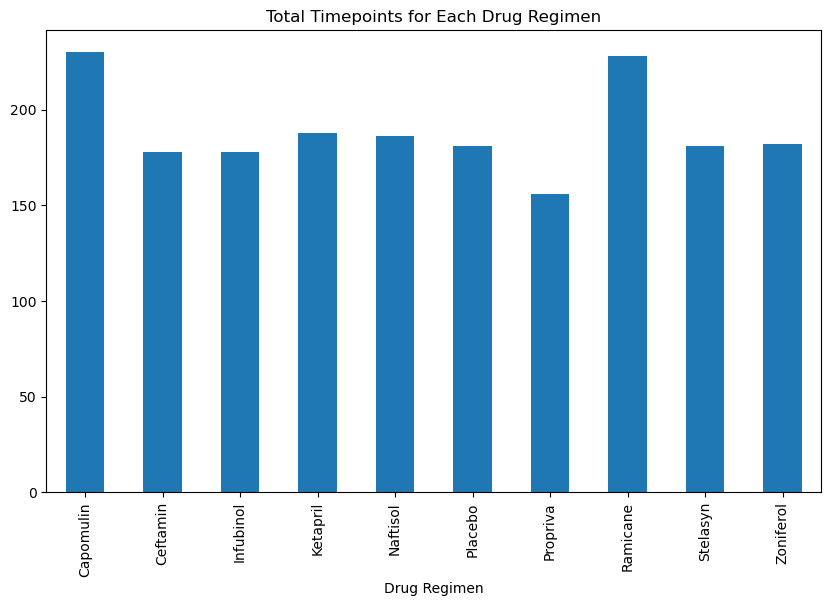

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = cleaned_data.groupby('Drug Regimen').count()['Timepoint']
timepoints_df = timepoints.reset_index()
pandas_bar_chart = timepoints_df.plot(kind='bar', x='Drug Regimen', y='Timepoint', 
                               title='Total Timepoints for Each Drug Regimen', 
                               legend=False, figsize=(10, 6))
#pandas_bar_chart

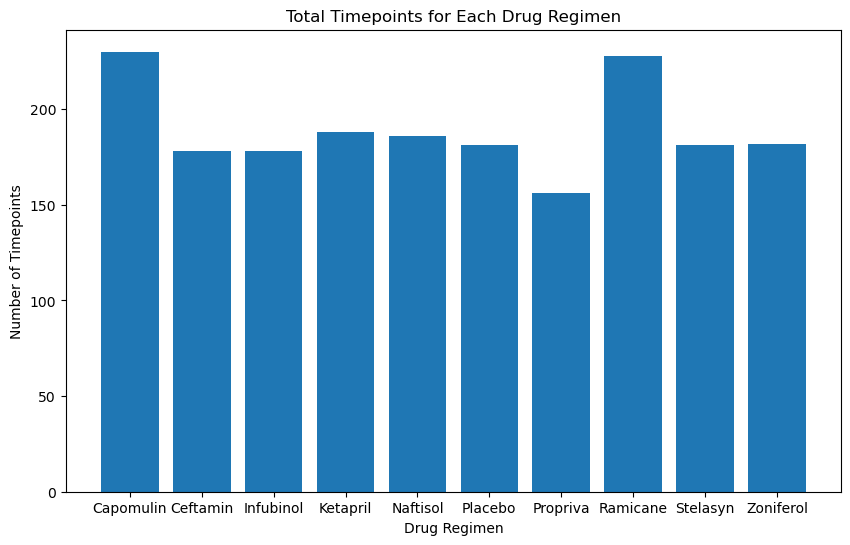

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(timepoints.index, timepoints.values)
plt.title('Total Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()



Sex
Male      958
Female    930
Name: count, dtype: int64

Text(0, 0.5, '')

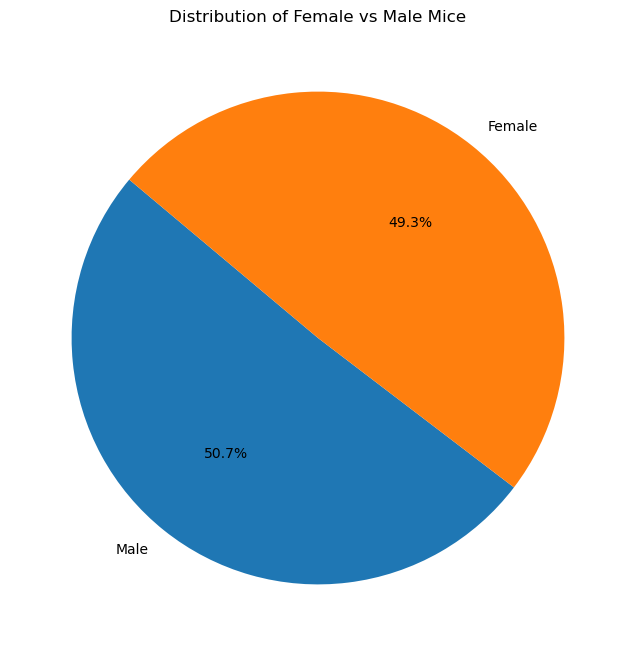

In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_distribution = cleaned_data['Sex'].value_counts()

# Get the unique mice with their gender
display(gender_distribution)

# Make the pie chart
pie_chart = gender_distribution.plot(kind='pie', autopct='%1.1f%%', 
                                     startangle=140, 
                                     title='Distribution of Female vs Male Mice', 
                                     figsize=(8, 8))
pie_chart.set_ylabel('')  # Hide the y-label to make the plot cleaner

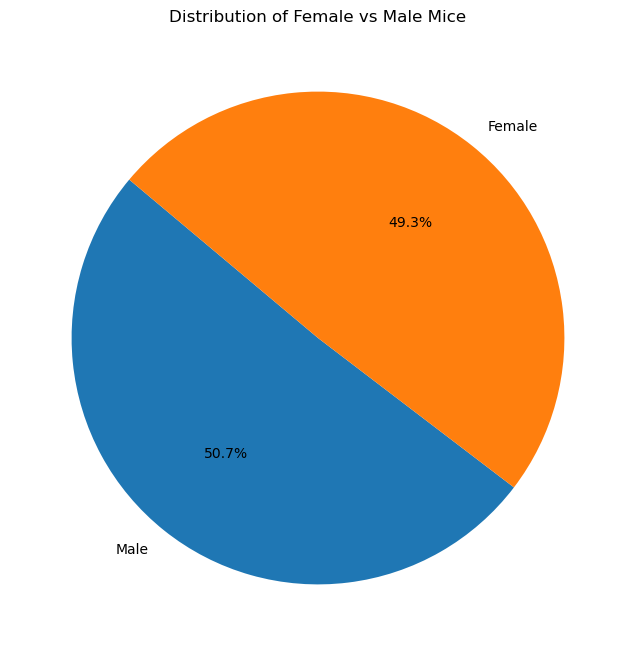

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female vs Male Mice')
plt.show()

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = cleaned_data.groupby('Mouse ID').agg(final_volume=('Tumor Volume (mm3)', 'last')).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = final_tumor_volume.merge(cleaned_data[['Mouse ID', 'Drug Regimen']], on='Mouse ID').drop_duplicates()
final_tumor_data

,Mouse ID,final_volume,Drug Regimen
0,a203,67.973419,Infubinol
10,a251,65.525743,Infubinol
20,a262,70.717621,Placebo
30,a275,62.999356,Ceftamin
40,a366,63.440686,Stelasyn
...,...,...,...
1845,z435,48.710661,Propriva
1848,z578,30.638696,Ramicane
1858,z581,62.754451,Infubinol
1868,z795,65.741070,Naftisol


In [19]:
# Put treatments into a list for for loop (and later for plot labels) Completed above
# Create empty list to fill with tumor vol data (for plotting) Completed above
# Calculate the IQR and quantitatively determine if there are any potential outliers.
import numpy as np
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_data[final_tumor_data['Drug Regimen'] == treatment]['final_volume']

    # add subset
    tumor_volumes.append(treatment_data) # Append to the list for plotting

    # Calculate quartiles and IQR
    quartiles = np.percentile(treatment_data, [25, 50, 75])
    iqr = quartiles[2] - quartiles[0]
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0] - (1.5 * iqr)
    upper_bound = quartiles[2] + (1.5 * iqr)

    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Print results
    print(f"\nTreatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outliers: {outliers.tolist()}")
    print("--------------------")

    


Treatment: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Number of outliers: 0
--------------------

Treatment: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Number of outliers: 0
--------------------

Treatment: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Number of outliers: 1
Outliers: [36.3213458]
--------------------

Treatment: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Number of outliers: 0
--------------------


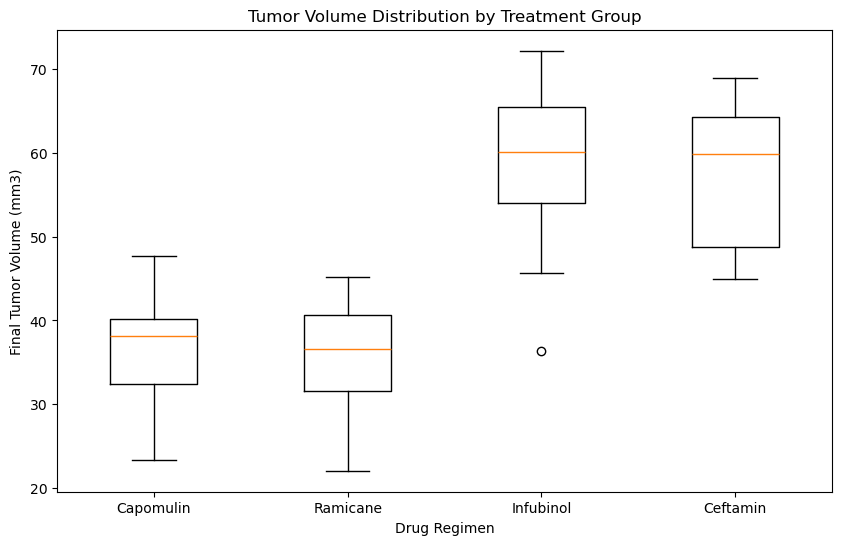

In [20]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatments)
plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()




## Line and Scatter Plots

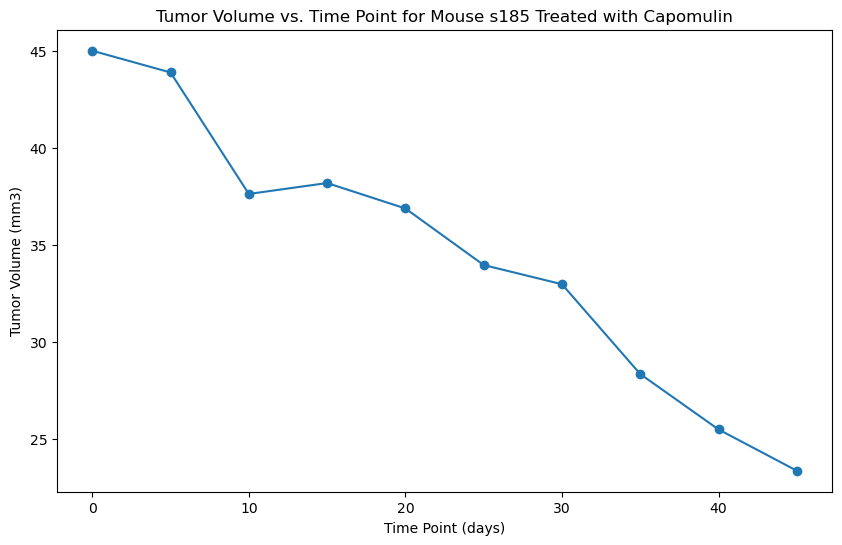

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == 's185')]
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs. Time Point for Mouse s185 Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


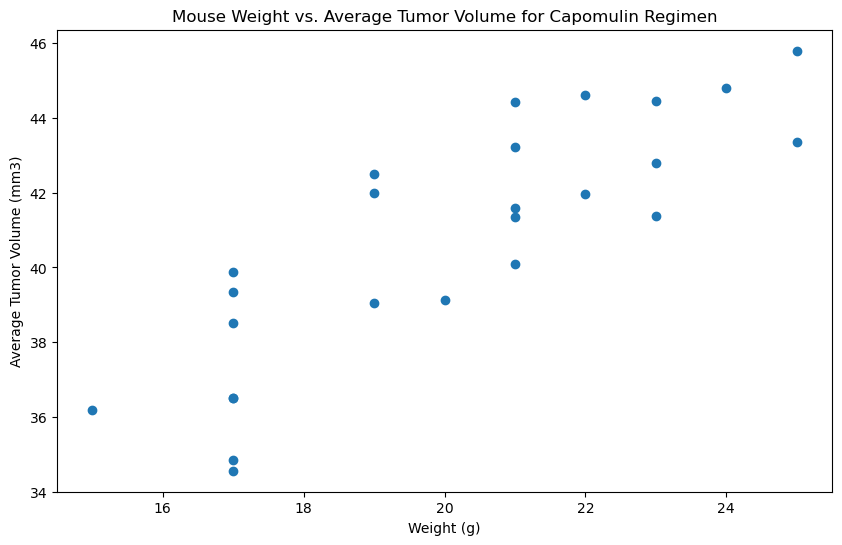

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg(avg_volume=('Tumor Volume (mm3)', 'mean')).reset_index()
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Merge the average tumor volume with the mouse weight
merged_data = pd.merge(average_tumor_volume, mouse_weight, on='Mouse ID')

# Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['avg_volume'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

Correlation coefficient: 0.8419363424694722


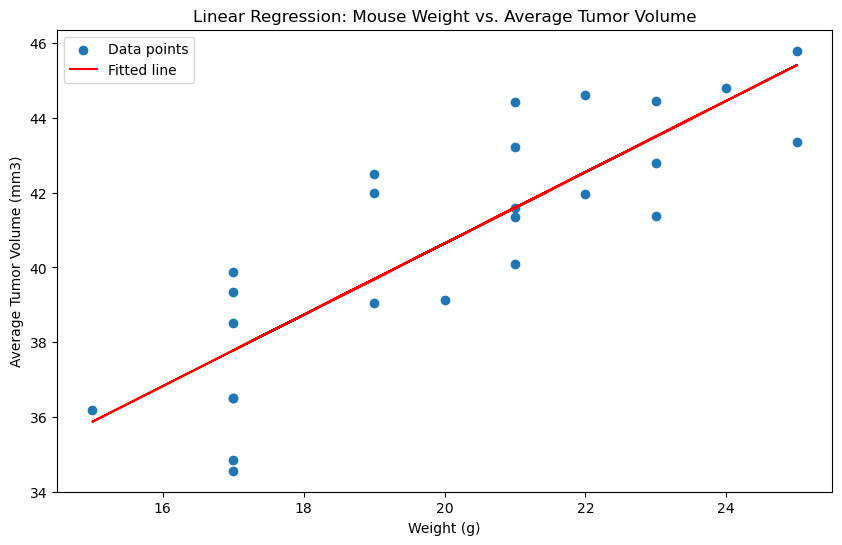

In [25]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
correlation = merged_data['Weight (g)'].corr(merged_data['avg_volume'])# Calculates the correlation coefficient
print(f"Correlation coefficient: {correlation}")

slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['avg_volume']) # Linear regression

# Plot the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['avg_volume'], label='Data points')
plt.plot(merged_data['Weight (g)'], intercept + slope*merged_data['Weight (g)'], 'r', label='Fitted line')
plt.title('Linear Regression: Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()
